In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [35]:
def TrueIValue(t,B,g,i0):
    I = (1-(g/B))/(1+ (1 - g/B - i0)/i0 * np.exp((g-B)*t))
    return I

In [36]:
def ForwardEulerSIS(s,i,B,g,dt):
    t = 0
    tlist = []
    Slist = []
    ilist=[]
    
    for n in range(0,200):
        tlist.append(t)
        Slist.append(s)
        ilist.append(i)

        #now we have to change the variables after moving a list once
        t = t + dt
        s = s + dt*(-B*s*i+g*i)
        i = i + dt*(B*Slist[-1]*i - g*i)
    
    return np.array(tlist), np.array(Slist), np.array(ilist)

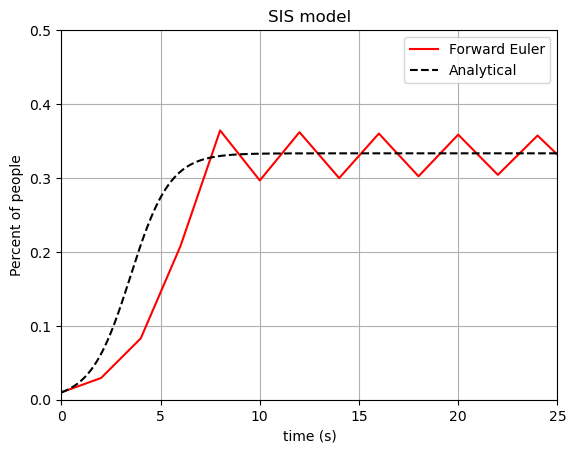

In [4]:
tlist,Slist,ilist =ForwardEulerSIS(0.99,0.01,3,2,2)
t = np.arange(0,25,0.01)
Ianswer = TrueIValue(t,3,2,0.01)

fig, ax = plt.subplots()
ax.set_ylim([0, 0.5])
ax.set_xlim([0, 25])
ax.plot(tlist, ilist,"r-",label="Forward Euler")
ax.plot(t, Ianswer,"k--",label="Analytical")

ax.set(xlabel='time (s)', ylabel='Percent of people',
       title='SIS model')
ax.legend()
ax.grid()

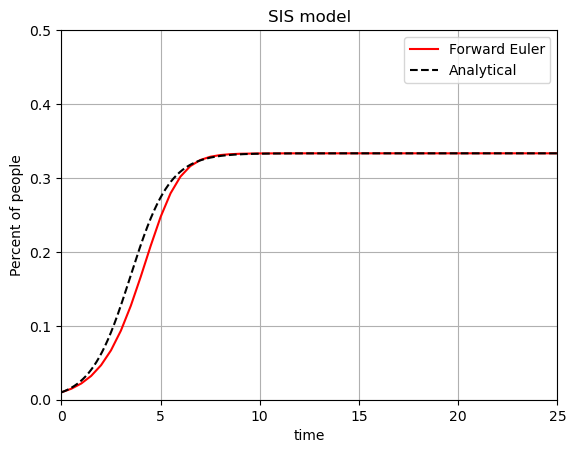

In [39]:
tlist,Slist,ilist =ForwardEulerSIS(0.99,0.01,3,2,0.5)
t = np.arange(0,25,0.01)
Ianswer = TrueIValue(t,3,2,0.01)

fig, ax = plt.subplots()
ax.set_ylim([0, 0.5])
ax.set_xlim([0, 25])
ax.plot(tlist, ilist,"r-",label="Forward Euler")
ax.plot(t, Ianswer,"k--",label="Analytical")

ax.set(xlabel='time', ylabel='Percent of people',
       title='SIS model')
ax.legend()
ax.grid()

In [41]:
def AbsoluteError(dt):
    tlist,Slist,ilist =ForwardEulerSIS(0.99,0.01,3,2,dt)
    
    Ianswer = TrueIValue(tlist,3,2,0.01)
    
    return(max(abs(ilist - Ianswer)))

Text(0.5, 1.0, 'log-log graph of error')

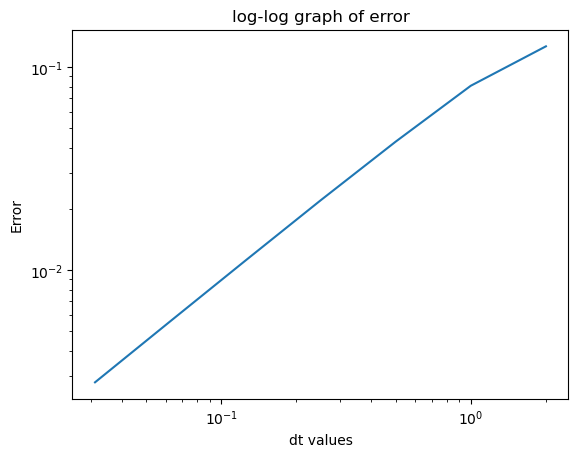

In [47]:
tlist = [2,1,1/2,1/4,1/8,1/16,1/32]
error = []
for item in tlist:
    error.append(AbsoluteError(item))
    

plt.yscale("log")
plt.xscale("log")
plt.plot(tlist,error)

plt.xlabel('dt values')
plt.ylabel('Error')
plt.title("log-log graph of error")
#plt.label('dt values')
#plt.set(xlabel='dt values', ylabel='Error',
      # title='log-log graph of error')

In [23]:
def Leaky(S,I,B,g,ve,VP,dt):
    t = 0
    r = 0
    tlist = []
    slist = []
    ilist = []
    vlist = []
    rlist = []
    
    N = S + I
    
    V = S*VP
    S = S - V
    
    s = S/N
    i = I/N
    v = V/N
    
    for n in range(0,100000):
        tlist.append(t)
        slist.append(s)
        ilist.append(i)
        vlist.append(v)
        rlist.append(r)
        
        t = t + dt
        s = slist[-1] + dt*(-B*slist[-1]*ilist[-1])
        v = vlist[-1] + dt*(-B*(1-ve)*vlist[-1]*ilist[-1])
        i = ilist[-1] + dt*(B*ilist[-1]*(slist[-1]+(1-ve)*vlist[-1]) - g*ilist[-1])
        r = rlist[-1] +dt*(g*ilist[-1])
        
    return np.array(tlist), np.array(slist)*N, np.array(ilist)*N, np.array(rlist)*N, np.array(vlist)*N
    

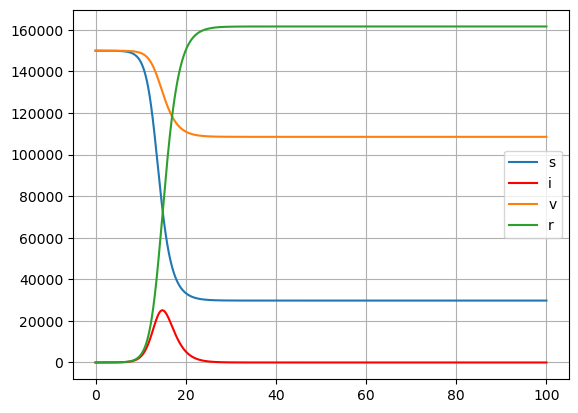

In [26]:
s = 300000 - 1
i = 1
B = 3
g = 1
ve = 0.8
Vp = 0.5
dt = 0.001
tlist,slist,ilist,rlist,vlist = Leaky(s,i,B,g,ve,Vp,dt)

fig, ax = plt.subplots()

ax.plot(tlist,slist,label="s")
ax.plot(tlist, ilist,"r-",label="i")
ax.plot(tlist,vlist,label="v")
ax.plot(tlist,rlist,label="r")

ax.legend()
ax.grid()

In [50]:
def AllorNothing(s,i,B,g,ve,VP,dt):
    t = 0
    r = 0
    tlist = []
    slist = []
    ilist=[]
    volist = []
    rlist = []
    VallList = []
    
    N = s + i
    Vacc = s*VP
    s = s - Vacc
    
    Vall = Vacc*ve
    Vo = Vacc*(1-ve)
    
    s = s/N
    i = i/N
    Vo = Vo/N
    
    
    for n in range(0,100000):
        tlist.append(t)
        slist.append(s)
        ilist.append(i)
        volist.append(Vo)
        rlist.append(r)
        VallList.append(Vall)
        
        t = t + dt
        s = slist[-1] + dt*(-B*s*ilist[-1])
        Vo = volist[-1] + dt*(-B*volist[-1]*ilist[-1])
        i = i + dt*(B*slist[-1]*ilist[-1] + B*volist[-1]*ilist[-1] - g*ilist[-1])
        r = r + dt*(g*ilist[-1])
        

    return np.array(tlist), np.array(slist)*N, np.array(ilist)*N, np.array(rlist)*N, np.array(volist)*N, np.array(VallList)        

169297.73808513465
225887.01226960358


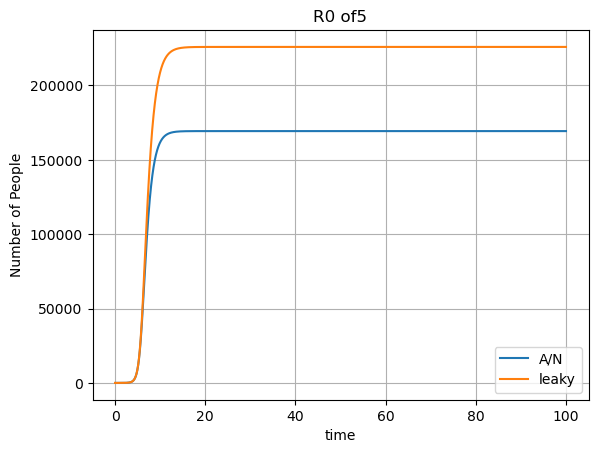

In [59]:
s = 300000 - 1
i = 1
B = 5
g = 1
ve = 0.8
Vp = 0.5
dt = 0.001
tlist1,slist,ilist,rlist1,volist,VallList = AllorNothing(s,i,B,g,ve,Vp,dt)
tlist2,slist,ilist,rlist2,vlist = Leaky(s,i,B,g,ve,Vp,dt)

print(rlist1[-1])
print(rlist2[-1])


fig, ax = plt.subplots()

ax.plot(tlist1,rlist1,label="A/N")
ax.plot(tlist2,rlist2,label="leaky")

ax.set(xlabel='time', ylabel='Number of People',
       title='R0 of ' +str(B))
ax.legend()
ax.grid()

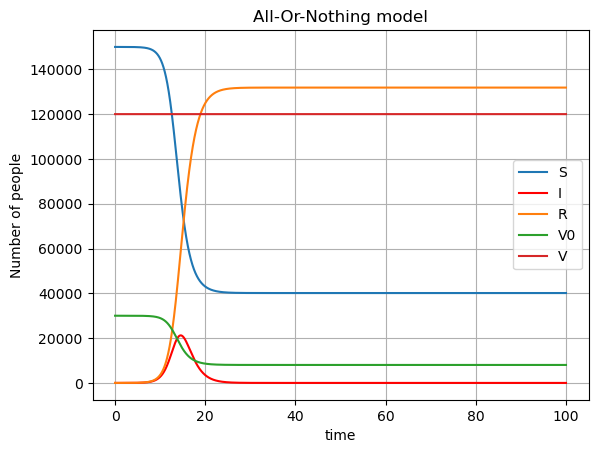

In [60]:
s = 300000 - 1
i = 1
B = 3
g = 1
ve = 0.8
Vp = 0.5
dt = 0.001
tlist,slist,ilist,rlist,volist,VallList = AllorNothing(s,i,B,g,ve,Vp,dt)

fig, ax = plt.subplots()

ax.plot(tlist,slist,label="S")
ax.plot(tlist, ilist,"r-",label="I")
ax.plot(tlist,rlist,label="R")
ax.plot(tlist,volist,label="V0")
ax.plot(tlist,VallList,label="V")

ax.set(xlabel='time', ylabel='Number of people',
       title='All-Or-Nothing model')
ax.legend()
ax.grid()

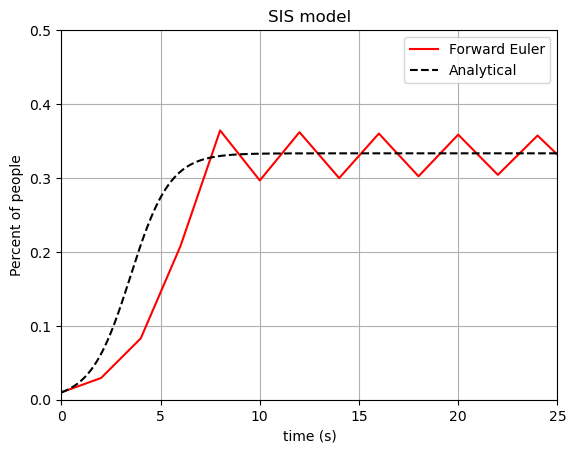

In [8]:
# SIS model
#set up variables
s = 0.99
i = 0.01
i0 = 0.01
B = 3
g = 2
t = 0
dt = 2
#r0 = b/g

#set up final lists to plot
tlist = []
Slist = []
ilist=[]
Ianswer = []
# start iterative process
for n in range(0,14):
    tlist.append(t)
    Slist.append(s)
    ilist.append(i)
    
    #I = (1-(g/B))/(1+ (1 - g/B - i0)/i0 * np.exp((g-B)*t))
    t = t + dt
    s = s + dt*(-B*s*i+g*i)
    # depleting s early ilist[-1]
    i = i + dt*(B*Slist[-1]*i - g*i)
    
    #Ianswer.append(I)


t = np.arange(0,25,0.01)
Ianswer = TrueIValue(t,B,g,i0)

# now we start thesolution to the equation:

#i(t) = (1-(1/R0))/(1+ (1- 1/R0 - i0)/i0 * e^(g-b)t)





fig, ax = plt.subplots()
ax.set_ylim([0, 0.5])
ax.set_xlim([0, 25])
ax.plot(tlist, ilist,"r-",label="Forward Euler")
ax.plot(t, Ianswer,"k--",label="Analytical")

ax.set(xlabel='time (s)', ylabel='Percent of people',
       title='SIS model')
ax.legend()
ax.grid()